# Getting Started with Python

## Import Statements

We're importing:
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# This allows us to create interactive plots with matplotlib
%matplotlib notebook

## Importing our data

* We'll use a Pandas to import three .csv files using the .read_csv() function to load them as "DataFrames"
    * We can set the header, automatically interpret dates, an set our table indexes

In [2]:
# incident.csv contains postal code of the incident, province, municipality, along with the date and incident ID
Incident = pd.read_csv(
    'Data/incident.csv',
    delimiter = ',',
    header = 0,
    parse_dates=['date'],
    index_col=['id_incident']
)

# victim.csv contains information on the victms including age, race, etc.
Victim = pd.read_csv(
    'Data/victim.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)

#police.csv contaisn information about the police department and oficer involved
Police = pd.read_csv(
    'Data/police.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)
print('Data Loaded.')

Data Loaded.


# # Joining all our data

* The three files share the same index "id_incident"
    * We can use this unique identifier to combine all our files into one.
* Then we can set the date as the index.

In [3]:
# First we'll join the incident and the victim records
Join_1 = Incident.join(Victim)
# Then we'll join the the police record
Join_2 = Join_1.join(Police)

# Resetting the index first allows us to keep 'id_incident'.
# We can call set_index('date') to set the date as the index.
# Setting drop to true, means that 'date' won't be duplicated as a column
PID_Canada = Join_2.reset_index().set_index('date',drop = True)

# Caling .columns function will give us all the column headers
print(PID_Canada.columns)

# Calling .head() will print the first 5 rows
PID_Canada.head()


Index(['id_incident', 'day_week', 'prov', 'city_town', 'postal_code',
       'location_type', 'id_victim', 'Name', 'age', 'gender', 'race',
       'ethnic_ancestry', 'immigrant_refugee_naturalized', 'armed_type',
       'cause_death', 'taser_deployed', 'injured_officer', 'excited_delirium',
       'mentral_distress_disorder', 'substance_abuse', 'summary', 'Department',
       'charge_type', 'Charges', 'Officers Involved'],
      dtype='object')


,id_incident,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,gender,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,Department,charge_type,Charges,Officers Involved
date,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,34.0,Male,...,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...,Service de police de la Ville de Montreal,None,No,0001-P1
2012-01-11,2,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,49.0,Male,...,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...,RCMP,None,No,0002-P1
2012-01-12,3,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,43.0,Male,...,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...,Halton Regional Police Service,None,No,0003-P1
2012-02-03,4,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,29.0,Male,...,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com...",Toronto Police Service,None,No,0004-P1
2012-02-13,5,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,27.0,Male,...,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an...",Hamilton Police Service,None,No,0005-P1


# Looking at the data

* Pandas has special functions
    * We can count, and summarize different variables

* We can quickly calculate statistics like averages
* We can [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) by a specific interval (e.g. Yearly)
* We can use matplotlib.pyplot (plt) to display our information

Number of Incidents:  462
Descriptive Statistics Age: 
 count    455.000000
mean      36.731868
std       11.775739
min       15.000000
25%       27.500000
50%       36.000000
75%       45.000000
max       77.000000
Name: age, dtype: float64

LinregressResult(slope=1.0485036119711042, intercept=-2080.252837977296, rvalue=0.7543604262227599, pvalue=0.0002978828736845745, stderr=0.22810752954681113, intercept_stderr=458.1555015697752)


<IPython.core.display.Javascript object>


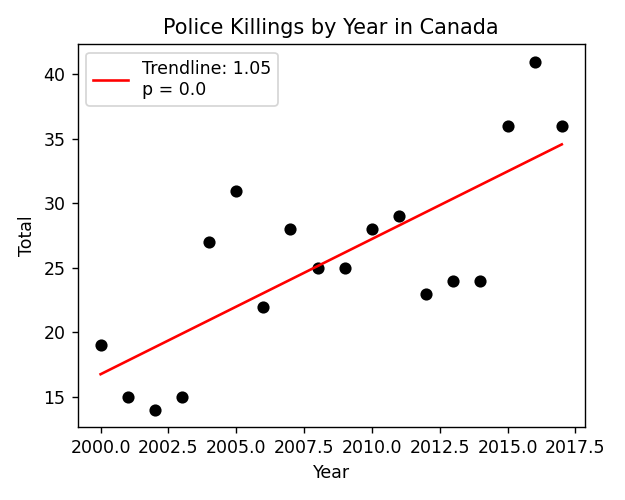

In [5]:
print('Number of Incidents: ',PID_Canada['id_incident'].count())
print('Descriptive Statistics Age: \n', PID_Canada['age'].describe())
print()

# Resample will aggregate the data over a given time interval
# 'Y' specifes we want years.  If you wanted monthly, you'd do 'M'
# .count() specifies how to aggregate.  If you have numeric data you can use .mean(), .std() etc. instead
# with text, you're limited to .count(), .first(), .last()
Yearly = PID_Canada.resample('Y').count()

## The linregress() function calcualtes a linear regression between the year and the number of killings
LR = stats.linregress(Yearly.index.year,Yearly['id_incident'])
print(LR)

# We can create a figure size 5x4
plt.figure(figsize=(5,4))

# .scatter() allows us to plot points
plt.scatter(Yearly.index.year,
            Yearly['id_incident'],
           color='black')

# .plots() allows us to plot lines
plt.plot(Yearly.index.year,
         Yearly.index.year*LR[0]+LR[1],
         color='red',
         label='Trendline: '+str(np.round(LR[0],2))+'\np = '+str(np.round(LR[3],3)))

# We can set some specifics here.
plt.title('Police Killings by Year in Canada')
plt.xlabel('Year')
plt.ylabel('Total')

# Calling .legend() will display all entites we set a label for
plt.legend()

# .tight_layout() allows us to make sure things fit nicely
plt.tight_layout()

## Aggregate data

The [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function allows us conduct specific queries like:
### What was the racial breakdown of victims?

<IPython.core.display.Javascript object>


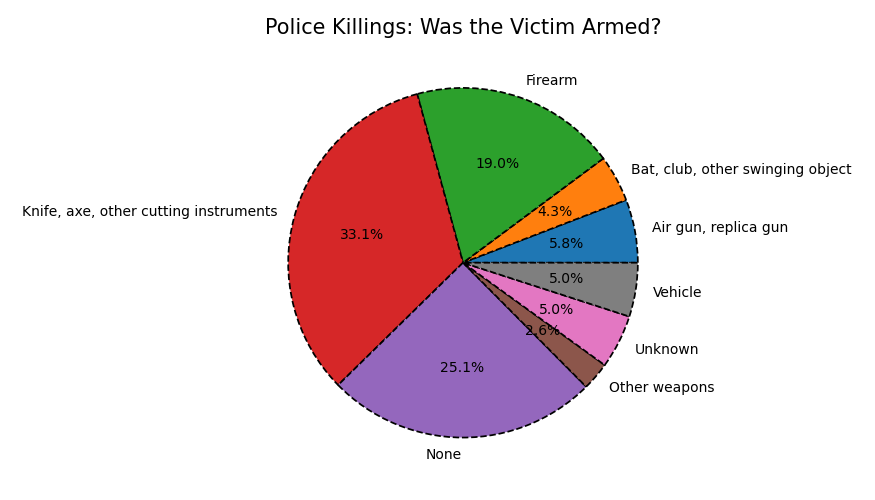

In [6]:
# .groupby() accepts one or more records to aggregate by
# .count() tells us how to aggregate
Armed = PID_Canada.groupby(['armed_type']).count()

plt.figure(figsize=(7,4))

# .pie() creates a pie chart
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()


## Editing data
* We can create a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp) define the replacements we want to make
* We can use some of pandas special functions to query and manipulate our data
    * The [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function allows us to search for records
    * The [.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function lets us replace values

<IPython.core.display.Javascript object>


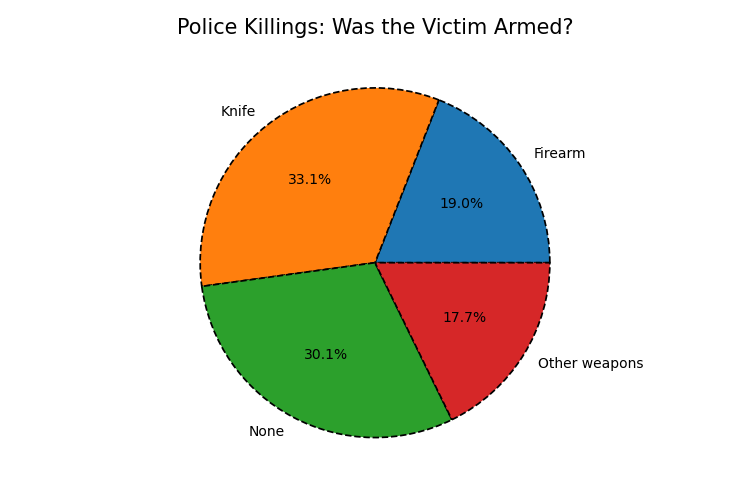

In [7]:
# Dictionaries use keys (eg. 'Vehicle') an values (eg. 'Other weapon')
# They let us quickly look up values by a key
replace_dict = {
    'Air gun, replica gun':'Other weapons',
    'Bat, club, other swinging object':'Other weapons',
    'Vehicle':'Other weapons',
    'Knife, axe, other cutting instruments':'Knife',
    'Unknown':'None'
          }

# We can loop through te keys in the dictionary and use them to replace the disired values
# .loc[] is a search command that allows us to perform specific querries
# we can use it in combination with an equal sign (=) to replace values for a given column(s)
for r in replace_dict.keys():
    PID_Canada.loc[PID_Canada['armed_type']==r,'armed_type']=replace_dict[r]
        
        
# Just making the same pic graph again
plt.figure(figsize=(6,4))
Armed = PID_Canada.groupby(['armed_type']).count()
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()

## More complex queries

Which police departments in Canada are most likely to kill an unarmed person?  Groupby can also accept multiple inputs.  

In [8]:
# Groupby allows us to search fo multiple records
Force = PID_Canada.groupby(['Department','armed_type']).count()['id_victim']
print(Force)

Department                           armed_type   
Abbotsford Police Department         None             1
Amherstburg Police Service           Knife            1
Anishnabe Takonewini Police Service  Firearm          1
                                     Knife            1
Barrie Police Services               Knife            1
                                                     ..
Winnipeg Police Service              Other weapons    3
York Regional Police                 Firearm          1
                                     Knife            4
                                     None             1
                                     Other weapons    2
Name: id_victim, Length: 130, dtype: int64


## Formatting the result

armed_type                           Firearm  Knife  None  Other weapons
Department                                                              
Abbotsford Police Department             NaN    NaN   1.0            NaN
Amherstburg Police Service               NaN    1.0   NaN            NaN
Anishnabe Takonewini Police Service      1.0    1.0   NaN            NaN
Barrie Police Services                   NaN    1.0   NaN            NaN
Bathurst Police Force                    NaN    NaN   1.0            NaN
...                                      ...    ...   ...            ...
Victoria Police Department               NaN    1.0   1.0            1.0
Waterloo Regional Police Service         NaN    2.0   2.0            NaN
Windsor Police Service                   NaN    NaN   1.0            NaN
Winnipeg Police Service                  NaN    9.0   2.0            3.0
York Regional Police                     1.0    4.0   1.0            2.0

[73 rows x 4 columns]
armed_type                  

<IPython.core.display.Javascript object>


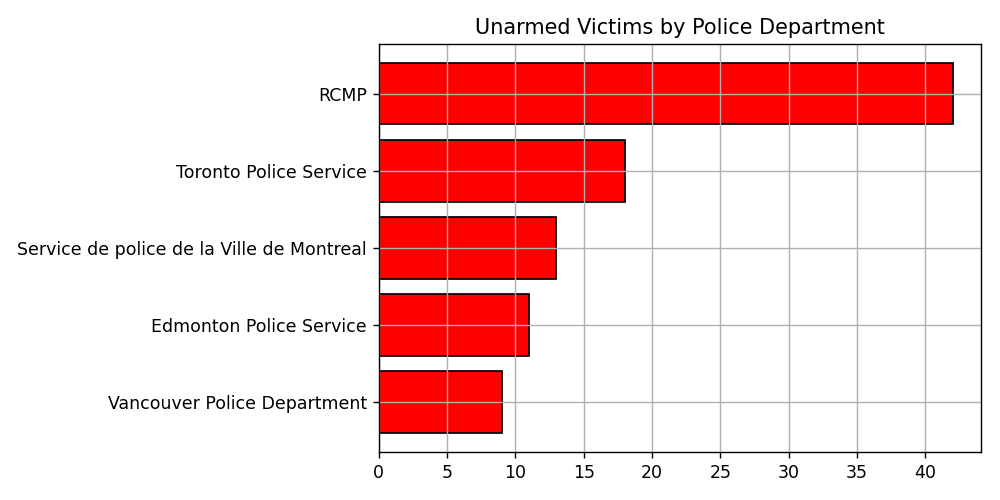

In [9]:
Force=Force.unstack()
print(Force)

Force_Top5 = Force.loc[Force['None']>1].sort_values(by='None')[-5:]

print(Force_Top5)

fig,ax= plt.subplots(1,1,figsize=(8,4))
ax.barh(Force_Top5.index,Force_Top5['None'],facecolor='#FF0000',edgecolor='black')
ax.set_title('Unarmed Victims by Police Department')
plt.grid()
plt.tight_layout()

## Looking at the demographic distribution

In [10]:
PID_Canada.groupby('race').count()['id_victim'].sort_values()

race
Latin American      3
Arab                5
Other               5
South Asian        10
Asian              15
Black              43
Indigenous         70
Unknown            99
Caucasian         212
Name: id_victim, dtype: int64

## Normalizing
* Canada is predominately white, we have to scale each group by the size of their population to calculate a police killing rate
    * We want calculate the Police Killing Rate per Million Residents per Year for White, Black, and Indigenous people.
    * What should we use as the scale factor?
        * Hint the dataset spans the years 2000 to 2017
    

<IPython.core.display.Javascript object>


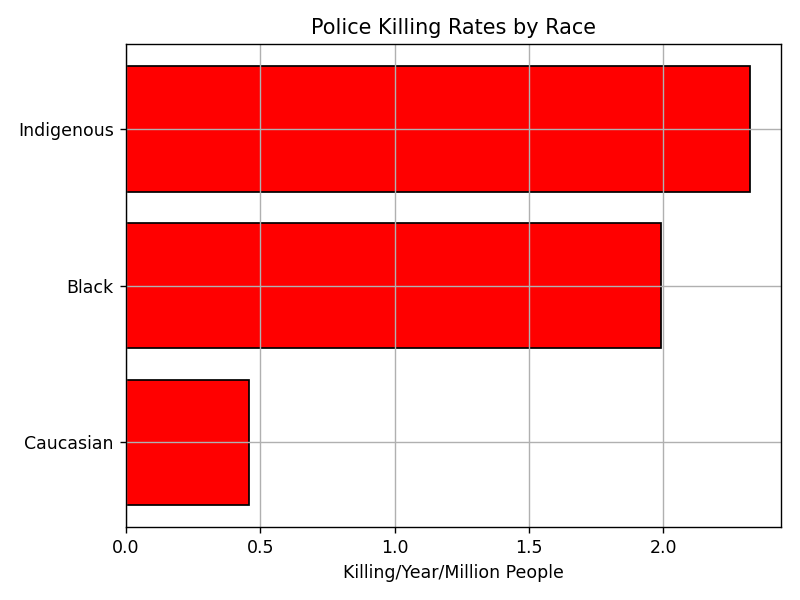

In [11]:
Race=['Caucasian','Black','Indigenous']
Population=[25803368,1198545,1673780]

scale = 1e6/18

Count = PID_Canada.groupby('race')['id_incident'].count()

plt.figure()

i=0
for race,population in (zip(Race,Population)):
    if race == 'Total Population':
        rate=((Count.sum()/population)*scale)
    else:
        rate=((Count[race]/population)*1e6/18)
    plt.barh(i,rate,color='#FF0000',edgecolor='black')
    i += 1
plt.yticks([0,1,2],Race)
plt.title('Police Killing Rates by Race')
plt.xlabel('Killing/Year/Million People')
plt.tight_layout()
    
plt.grid()

## Saving Data

* We can save our data easily using the [.tocsv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function



In [ ]:
PID_Canada.to_csv('Data/PID_Canada.csv')
print('Data Saved')
print(PID_Canada)